# Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov (KS) test is a statistical method used to assess whether a sample of data follows a particular distribution or if two samples come from the same distribution. It's a non-parametric test, which means it makes minimal assumptions about the underlying distribution of the data.

In essence, the KS test helps you determine if there is a significant difference between the distribution of your sample data and the distribution you're comparing it to. If the calculated test statistic is small and the p-value associated with it is large (usually above a chosen significance level), you have evidence to suggest that your sample follows the expected distribution. Conversely, a large test statistic and a small p-value would indicate a significant difference between the two distributions.

The null hypothesis and the alternative hypothesis are fundamental concepts that help you draw conclusions about the data:

* Null Hypothesis (H0):
The null hypothesis, often denoted as H0, is a statement that there is no significant difference between the distribution of the sample data and the expected distribution (the theoretical distribution you're comparing to). In other words, it assumes that any observed differences between the two distributions are due to random chance or sampling variability. In terms of the KS test, the null hypothesis can be stated as: "The sample data follows the expected distribution."

* Alternative Hypothesis (H1 or Ha):
The alternative hypothesis, often denoted as H1 or Ha, contradicts the null hypothesis. It suggests that there is a significant difference between the distribution of the sample data and the expected distribution. It's essentially the hypothesis you're testing for evidence to support. In terms of the KS test, the alternative hypothesis can be stated as: "The sample data does not follow the expected distribution."

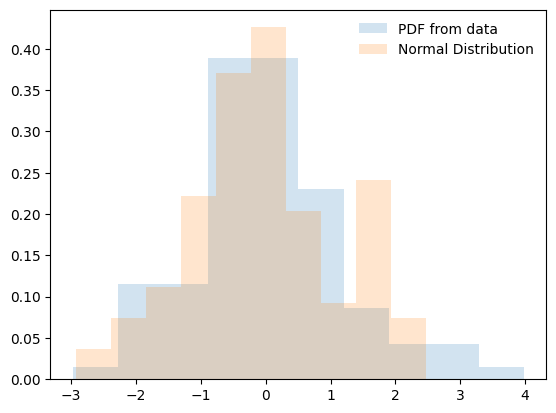

KstestResult(statistic=0.05504092003731731, pvalue=0.9059002461492148, statistic_location=1.695829574470754, statistic_sign=-1)

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

def calc_pdf(data, bins=10):
    # getting data of the histogram
    count, bins_count = np.histogram(data, bins=bins)
    pdf = count / sum(count)
    return pdf, bins_count

def calc_cdf(data, bins=10):
    pdf, bins_count = calc_pdf(data, bins)
    cdf = np.cumsum(pdf)
    return bins_count[1:], cdf

# Two random variables
r = stats.norm.rvs(loc=0, scale=1.2, size=100)
r2 = stats.norm.rvs(loc=0, scale=1, size=100)

# r = np.linspace(0,10)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, label="Normal Distribution")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

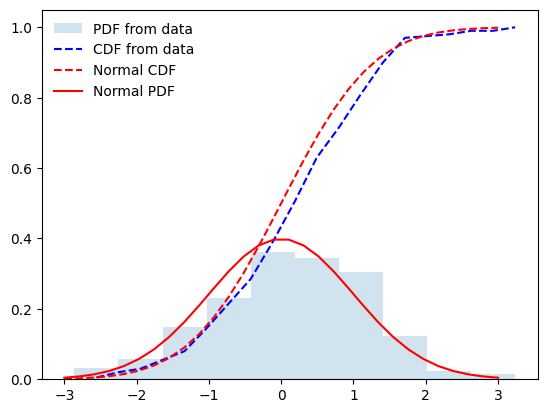

KstestResult(statistic=0.08986762643658813, pvalue=0.07430171775608108, statistic_location=0.11270460894309828, statistic_sign=-1)

In [3]:
###########################################
# KS One-Sample test

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)

xs = np.linspace(-3, 3, 30)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.plot(bc, cdf, 'b--', label="CDF from data")
ax.plot(xs, stats.norm.cdf(xs, 0, 1), 'r--', label="Normal CDF")
ax.plot(xs, stats.norm.pdf(xs, 0, 1), label="Normal PDF", color="red")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

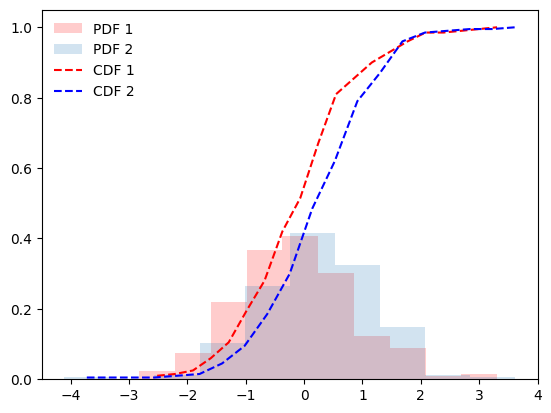

KstestResult(statistic=0.185, pvalue=0.0020827633834865906, statistic_location=0.47855039579359865, statistic_sign=1)

In [4]:
###########################################
# KS Two-Sample test 

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)
r2 = stats.norm.rvs(loc=0.1, scale=1, size=200)
bc2, cdf2 = calc_cdf(r2, 20)

fig, ax = plt.subplots(1, 1)
ax.hist(r, color='r', density=True, histtype='stepfilled', alpha=0.2, label="PDF 1")
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, label="PDF 2")

ax.plot(bc, cdf, 'r--', label="CDF 1")
ax.plot(bc2, cdf2, 'b--', label="CDF 2")
ax.legend(loc='best', frameon=False)
plt.show()

###################################

stats.ks_2samp(r, r2)

# Kullback-Leibler and Jensen-Shannon Divergences

The Kullback-Leibler (KL) divergence is a measure from information theory that quantifies how one probability distribution differs from a second, reference distribution. It is often described as the "relative entropy" between two distributions. KL divergence is non-symmetric and is useful in various fields such as machine learning, statistics, and signal processing, where it helps compare the similarity between probability models. A smaller KL divergence indicates that the two distributions are more similar, while a larger value signifies greater divergence.

Jensen-Shannon Divergence (JSD) is a method used to measure the similarity between two probability distributions. It's a symmetric and smoothed version of Kullback-Leibler divergence and works well for detecting drift in categorical data.

Steps:
- Calculate the probability distributions of each category in both datasets.
- Compute the JSD score between the two distributions.

KL Divergence:  -2.112927302855002
JS Divergence:  0.17598647871764062


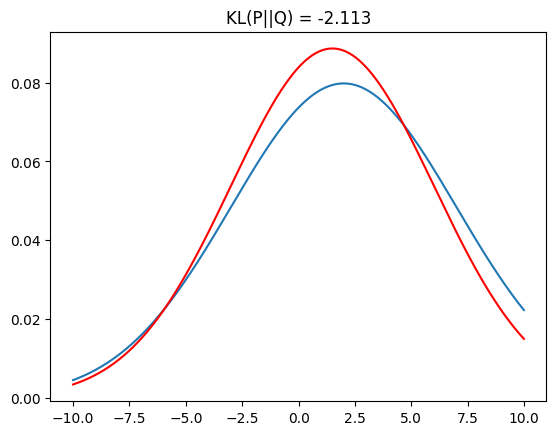

In [8]:
import numpy as np

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

x = np.arange(-10, 10, 0.01)
p = norm.pdf(x, 2, 5)
# q = norm.pdf(x, 0, 2)
q = norm.pdf(x, 1.5, 4.5)

print('KL Divergence: ' , kl_divergence(p, q))
print('JS Divergence: ' , js_divergence(p, q))

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')


# Chi-square Test

The Chi-Square (χ²) test for independence is a statistical method used to determine if there is a significant association between two categorical variables. It helps to assess whether the distribution of one variable is dependent on the distribution of another variable. In other words, it examines if there is a relationship between the two variables beyond what would be expected by chance.

Here's an explanation of the Chi-Square test for independence:

### Setup:

* You have two categorical variables. For example, consider a survey where one variable is "Gender" (with categories: Male, Female) and the other variable is "Preference for Product" (with categories: Yes, No).
* You want to investigate whether there's a relationship between gender and preference for the product.
### Hypotheses:

* Null Hypothesis (H0): There is no association between the two variables. In other words, the distribution of one variable is independent of the other.
* Alternative Hypothesis (Ha): There is an association between the two variables. The distribution of one variable is dependent on the other.
### Expected Frequencies:

* The Chi-Square test compares the observed frequencies of combinations of categories with the expected frequencies that would be observed if the two variables were independent.
* The expected frequencies are calculated assuming independence and are based on the marginal totals (the totals for each category in each variable).
### Calculating the Test Statistic:

* The Chi-Square test statistic measures the difference between the observed and expected frequencies in each cell of a contingency table (a table that displays the counts of the combinations of the two variables' categories).
* The formula for calculating the test statistic involves summing up the squared differences between observed and expected frequencies, divided by the expected frequency.
### Degrees of Freedom and Critical Value:

* The degrees of freedom for the Chi-Square test for independence depend on the dimensions of the contingency table (number of rows minus 1 times number of columns minus 1).
* With the test statistic and degrees of freedom, you can find the critical value from the Chi-Square distribution table or a statistical calculator. This critical value helps you determine whether the test statistic is statistically significant.
### Interpreting Results:

* Compare the calculated Chi-Square test statistic with the critical value.
* If the calculated test statistic is larger than the critical value, you reject the null hypothesis and conclude that there is a significant association between the variables.
* If the test statistic is not larger than the critical value, you do not have enough evidence to reject the null hypothesis, suggesting that there isn't a significant association between the variables.


In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn import preprocessing
import numpy as np
import pandas as pd
from collections import Counter

significance = 0.1

# ######################################################
# # Test for Independence

# distribution_1 = ['cat', 'dog', 'dog', 'cat', 'bird', 'dog', 'cat', 'cat', 'dog']
# # distribution_2 = ['cat', 'dog', 'dog', 'cat', 'bird', 'dog', 'cat', 'cat', 'dog']
# distribution_2 = ['bird', 'dog', 'building', 'bird', 'dog', 'dog', 'building', 'bird', 'dog']
# # distribution_2 = ['car', 'car', 'fish', 'bird', 'dog', 'building', 'fish', 'fish', 'fish']

# # Count the occurrences of each category
# count_1 = Counter(distribution_1)
# count_2 = Counter(distribution_2)

# # Ensure both distributions have the same categories
# all_categories = list(set(count_1.keys()).union(set(count_2.keys())))

# # Create contingency table using the counts for each category
# contingency_table = np.array([[count_1.get(cat, 0) for cat in all_categories],
#                               [count_2.get(cat, 0) for cat in all_categories]])


#################################################################
## Categories as values
distribution_1 = [50, 30, 20]  # Distribution before drift
distribution_2 = [24, 30, 50]  # Distribution after drift

# Combine both distributions into a contingency table
contingency_table = np.array([distribution_1, distribution_2])

#################################################################
# Perform Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table, correction=False)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

if p_value < significance:
	print('reject Ho - There is drift')
else:
	print('accept Ho - There is no drift')


# Permutation Test

It is a non-parametric method that can be used to compare two categorical distributions. It works by repeatedly shuffling the data between the two groups and calculating a test statistic (like the difference in category proportions). The actual difference is then compared to the distribution of shuffled differences.



In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate test statistic (e.g., Chi-Square statistic)
def calc_stat_cont(pop1, pop2):
    # Create a contingency table from the two populations
    obs = np.array([np.bincount(pop1, minlength=max(np.max(pop1), np.max(pop2)) + 1),
                    np.bincount(pop2, minlength=max(np.max(pop1), np.max(pop2)) + 1)])
    # Perform Chi-Square test on the contingency table
    chi2_stat, p, dof, expected = chi2_contingency(obs, correction=False)
    return chi2_stat

def calc_stat_cat(pop1, pop2):
    count_1 = Counter(pop1)
    count_2 = Counter(pop2)

    # Ensure both distributions have the same categories
    all_categories = list(set(count_1.keys()).union(set(count_2.keys())))

    # Create contingency table using the counts for each category
    contingency_table = np.array([[count_1.get(cat, 0) for cat in all_categories],
                                  [count_2.get(cat, 0) for cat in all_categories]])

    chi2_stat, p, dof, expected = chi2_contingency(contingency_table, correction=False)
    return chi2_stat

# Example categorical data (numeric encoding for simplicity)
# pop1 = np.array([0, 1, 1, 0, 2, 1, 0, 0, 1])  # Categorical values encoded as integers
# pop2 = np.array([0, 1, 1, 2, 1, 1, 0, 0, 3])
# original_stat = calc_stat_cont(pop1, pop2)

pop1 = ['cat', 'dog', 'dog', 'cat', 'bird', 'dog', 'cat', 'cat', 'dog']
pop2 = ['cat', 'dog', 'dog', 'cat', 'bird', 'dog', 'cat', 'cat', 'dog']
# pop2 = ['bird', 'dog', 'building', 'bird', 'dog', 'dog', 'building', 'bird', 'dog']
# pop2 = ['car', 'car', 'fish', 'bird', 'dog', 'building', 'fish', 'fish', 'fish']
original_stat = calc_stat_cat(pop1, pop2)

# Perform permutation test
n_permutations = 1000
permuted_stats = np.zeros(n_permutations)
combined = np.concatenate([pop1, pop2])

for i in range(n_permutations):
    np.random.shuffle(combined)
    perm_pop1 = combined[:len(pop1)]
    perm_pop2 = combined[len(pop1):]
    permuted_stats[i] = calc_stat_cat(perm_pop1, perm_pop2)

# Calculate p-value
p_value = np.mean(permuted_stats >= original_stat)

print(f"Original Test Statistic: {original_stat}")
print(f"Permutation p-value: {p_value}")
if p_value < significance:
	print('reject Ho - There is drift')
else:
	print('accept Ho - There is no drift')

# Subpopulation Analysis

Subpopulation analysis is a critical approach in research that examines the effects of interventions or exposures across distinct demographic or clinical groups within a larger population. By focusing on specific subgroups—such as those defined by age, gender, ethnicity, or underlying health conditions—researchers can uncover hidden biases and variations in treatment responses, outcomes, and adverse effects that may be obscured in aggregate data. This analytical strategy not only enhances the understanding of health disparities but also informs more personalized and effective clinical practices, ensuring that interventions are tailored to the unique needs of diverse patient populations. In this context, subpopulation analysis serves as a vital tool for promoting equity in healthcare and advancing the overall efficacy of medical research.

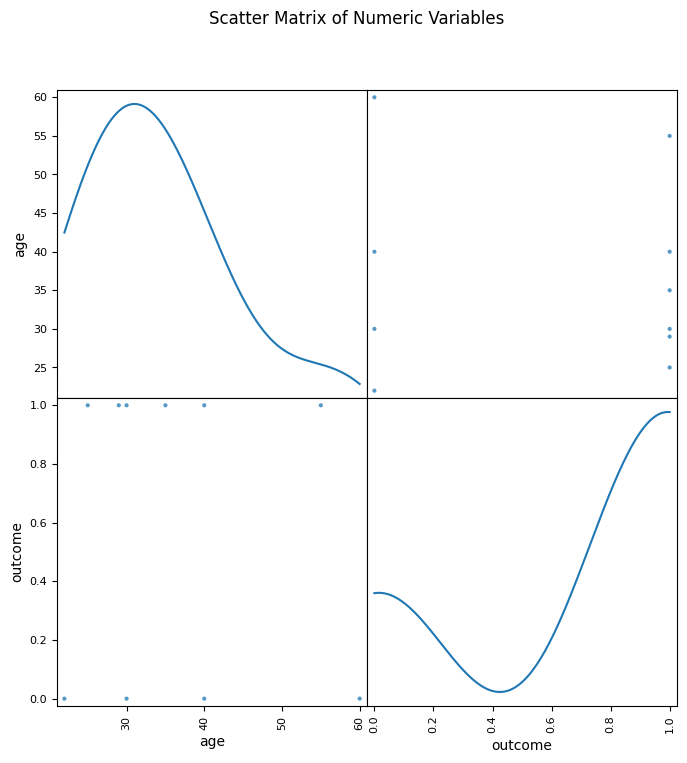

/var/folders/07/_bz2cvzj4bv6f1bl2w28d9nw0000gn/T/ipykernel_10007/2636873471.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outcome_by_gender, x='gender', y='outcome', palette='viridis')


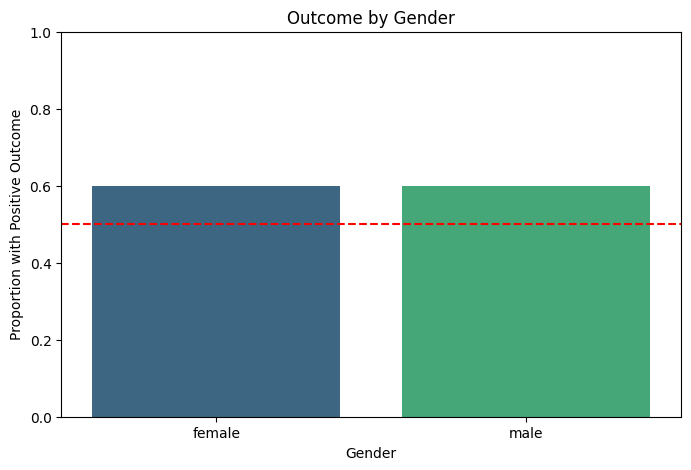

/var/folders/07/_bz2cvzj4bv6f1bl2w28d9nw0000gn/T/ipykernel_10007/2636873471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outcome_by_age_group, x='age_group', y='outcome', palette='plasma')


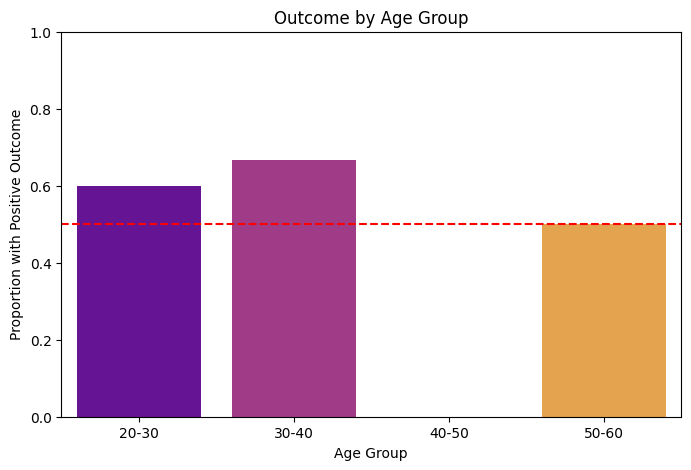

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Sample data
data = {
    'age': [25, 30, 35, 40, 22, 30, 29, 40, 55, 60],
    'gender': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
    'outcome': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

########
# Scatter matrix plot for all numeric variables
numeric_columns = ['age', 'outcome']
scatter_matrix(df[numeric_columns], figsize=(8, 8), diagonal='kde', alpha=0.75)
plt.suptitle('Scatter Matrix of Numeric Variables')
plt.show()
########

# Analyze outcome by gender
outcome_by_gender = df.groupby('gender')['outcome'].mean().reset_index()

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=outcome_by_gender, x='gender', y='outcome', palette='viridis')
plt.title('Outcome by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion with Positive Outcome')
plt.ylim(0, 1)
plt.axhline(0.5, linestyle='--', color='red')  # Line to indicate a neutral outcome
plt.show()

# Analyze outcome by age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

outcome_by_age_group = df.groupby('age_group')['outcome'].mean().reset_index()

# Visualize age group outcomes
plt.figure(figsize=(8, 5))
sns.barplot(data=outcome_by_age_group, x='age_group', y='outcome', palette='plasma')
plt.title('Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Positive Outcome')
plt.ylim(0, 1)
plt.axhline(0.5, linestyle='--', color='red')
plt.show()
